In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [103]:
def one_hot_encode_columns(columns_to_encode:list, df:pd.DataFrame)->pd.DataFrame:
  """
  Takes in a list of columns to normalize

  Args:
      columns_to_encode (list): _description_

  Returns:
      pd.DataFrame: _description_
  """
  
  col_change = {
    "Married":["Yes","No"],
    "Education":["Graduate","Not Graduate"],
    "Gender":["Male","Female"],
    "Self_Employed":["Yes","No"],
    "Loan_Status":["Y","N"]
    }
  for idx, col in enumerate(columns_to_encode):
    first, second = col_change[col]
    df[col] = df[col].apply(lambda x: 1 if x == first else 0)
  
  df["Rural"] = df["Property_Area"].apply(lambda x: 1 if x =="Rural" else 0)
  df["Urban"] = df["Property_Area"].apply(lambda x: 1 if x =="Urban" else 0)
  df["Semiurban"] = df["Property_Area"].apply(lambda x: 1 if x =="Semiurban" else 0)
    
  return df
  

In [93]:
def logistic_regression_analysis(df:pd.DataFrame, y:str, cols_to_drop:list)->None:
  """
  Logistic Regression Function

  Args:
      df (_type_): Takes in a pd.Dataframe, a y column name and a list of columns to drop
  """
  X = df.drop(cols_to_drop, axis=1)
  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
  
  logistic_regression = LogisticRegression()

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")
  

def KNN_analysis(df:pd.DataFrame, y:str, cols_to_drop:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  X = df.drop(cols_to_drop, axis=1)
  
  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
  
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

def SVM_analysis(df:pd.DataFrame, y:str, cols_to_drop:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  X = df.drop(cols_to_drop, axis=1)
  
  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  svm_pred = svm_model.predict(X_test)
  print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

In [104]:
df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [105]:
columns_to_encode = ["Married", "Education","Gender","Self_Employed","Loan_Status"]
df.fillna(0, inplace=True)
df = one_hot_encode_columns(columns_to_encode, df)
df.drop(["Loan_ID", "Dependents","Property_Area"],axis=1,inplace=True)

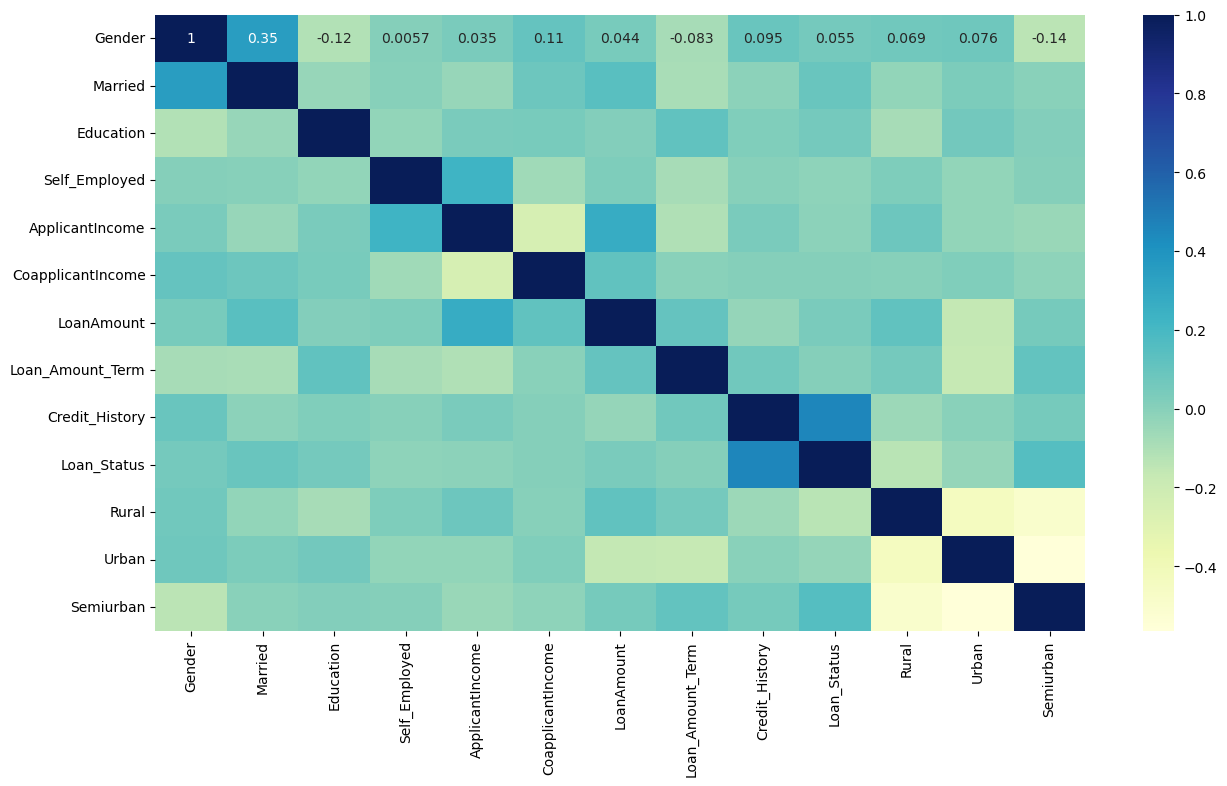

In [107]:
plt.figure(figsize= (15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

# Logistic Regression Analysis

#### Loan Status Dependent Variable

In [108]:
cols_to_drop, y = ["Loan_Status"], df["Loan_Status"]
logistic_regression_analysis(df, y,cols_to_drop)

              precision    recall  f1-score   support

           0       0.64      0.40      0.49        35
           1       0.77      0.90      0.83        80

    accuracy                           0.75       115
   macro avg       0.71      0.65      0.66       115
weighted avg       0.73      0.75      0.73       115

The Accuracy: 0.7478260869565218


#### Credit History Dependent Variable

In [109]:
cols_to_drop, y = ["Credit_History"], df["Credit_History"]
logistic_regression_analysis(df, y, cols_to_drop)

              precision    recall  f1-score   support

         0.0       0.43      0.42      0.43        24
         1.0       0.85      0.86      0.85        91

    accuracy                           0.77       115
   macro avg       0.64      0.64      0.64       115
weighted avg       0.76      0.77      0.76       115

The Accuracy: 0.7652173913043478


# KNN Analysis

#### Loan Status Dependent Variable

In [110]:
cols_to_drop, y = ["Loan_Status"], df["Loan_Status"]
KNN_analysis(df, y,cols_to_drop)

KNN Accuracy: 0.6956521739130435


#### Credit History Dependent Variable

In [111]:
cols_to_drop, y = ["Credit_History"], df["Credit_History"]
KNN_analysis(df, y,cols_to_drop)

KNN Accuracy: 0.7304347826086957


# Support Vector Machine Analysis

#### Loan Status Depedent Variable

In [112]:
cols_to_drop, y = ["Loan_Status"], df["Loan_Status"]
SVM_analysis(df, y,cols_to_drop)

SVM Accuracy: 0.6956521739130435


#### Credit History Dependent Variable

In [113]:
cols_to_drop, y = ["Credit_History"], df["Credit_History"]
SVM_analysis(df, y,cols_to_drop)

SVM Accuracy: 0.7913043478260869
